# Class Balancing

**Import Dependencies**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

**Load the dataset**

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
names = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
data = pd.read_csv(url, names=names)

print(data.head())
print(data.isnull().sum())

   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


**Separate features (X) and labels (y)**

In [4]:
X = data.drop(["Id", "Type"], axis=1)
y = data["Type"]

**Feature Engineering**

In [5]:
X["Light_elements"] = X["Na"] + X["Mg"]
X["Heavy_elements"] = X["Al"] + X["Si"] + X["K"] + X["Ca"] + X["Ba"] + X["Fe"]
X["Total_elements"] = (
        X["Na"] + X["Mg"] + X["Al"] + X["Si"] + X["K"] + X["Ca"] + X["Ba"] + X["Fe"]
)

**Scaling**

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split the data into training, validation, and test sets**

In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

**Apply RandomOverSampler to balance the class distribution**

In [8]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

**Train a Logistic Regression model on the resampled training data**

In [9]:
model = LogisticRegression(solver="saga", penalty="l2", max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42, solver='saga')

**Define hyperparameter grid and find the best model**

In [10]:
param_grid = {"C": [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000), param_grid, cv=5, n_jobs=-1
)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

**Evaluate the model on the validation set**

In [11]:
y_pred_val = best_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
confusion_val = confusion_matrix(y_val, y_pred_val)
classification_report_val = classification_report(y_val, y_pred_val)

print(
    f"""Validation Accuracy:"
{accuracy_val}

"Confusion Matrix:"
{confusion_val}

"Classification Report:"
{classification_report_val}
"""
)

Validation Accuracy:"
0.875

"Confusion Matrix:"
[[9 0 1 0 0 0]
 [2 6 1 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 5]]

"Classification Report:"
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       1.00      0.67      0.80         9
           3       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5

    accuracy                           0.88        32
   macro avg       0.90      0.93      0.90        32
weighted avg       0.91      0.88      0.88        32


**Evaluate the model on the test set**

In [12]:
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)

print(
    f"""Test Accuracy:"
{accuracy_test}

"Confusion Matrix:"
{confusion_test}

"Classification Report:"
{classification_report_test}
"""
)

Test Accuracy:"
0.5454545454545454

"Confusion Matrix:"
[[4 3 2 0 0 0]
 [2 7 3 1 1 0]
 [1 0 0 0 0 0]
 [0 0 1 2 0 0]
 [0 0 0 0 1 0]
 [1 0 0 0 0 4]]

"Classification Report:"
              precision    recall  f1-score   support

           1       0.50      0.44      0.47         9
           2       0.70      0.50      0.58        14
           3       0.00      0.00      0.00         1
           5       0.67      0.67      0.67         3
           6       0.50      1.00      0.67         1
           7       1.00      0.80      0.89         5

    accuracy                           0.55        33
   macro avg       0.56      0.57      0.55        33
weighted avg       0.66      0.55      0.59        33



**Display class distribution before and after resampling**

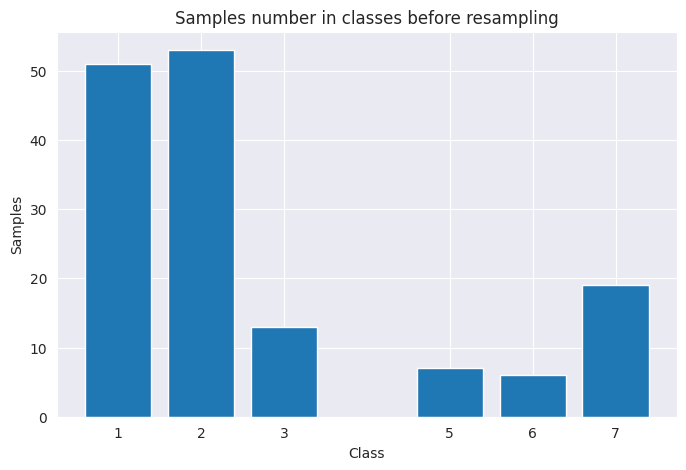

Samples number in classes before resampling:
Class 1: 51 samples
Class 2: 53 samples
Class 3: 13 samples
Class 5: 7 samples
Class 6: 6 samples
Class 7: 19 samples


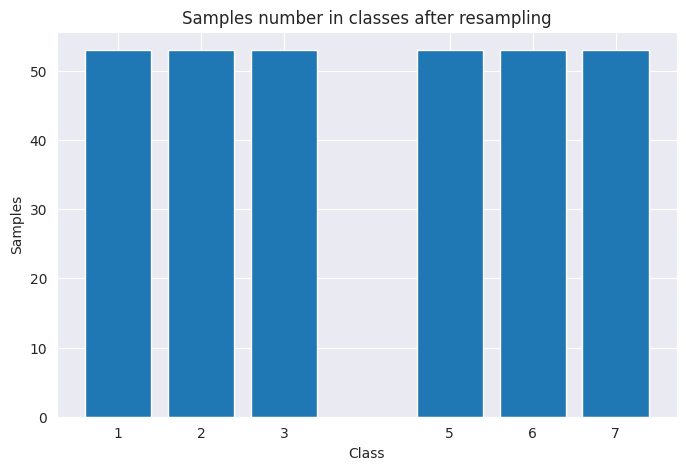

Samples number in classes after resampling:
Class 1: 53 samples
Class 2: 53 samples
Class 3: 53 samples
Class 5: 53 samples
Class 6: 53 samples
Class 7: 53 samples


In [13]:
unique_classes, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8, 5))
plt.bar(unique_classes, counts)
plt.xlabel("Class")
plt.ylabel("Samples")
plt.title("Samples number in classes before resampling")
plt.xticks(unique_classes)
plt.show()

print("Samples number in classes before resampling:")
for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} samples")

unique_classes, counts = np.unique(y_train_resampled, return_counts=True)

plt.figure(figsize=(8, 5))
plt.bar(unique_classes, counts)
plt.xlabel("Class")
plt.ylabel("Samples")
plt.title("Samples number in classes after resampling")
plt.xticks(unique_classes)
plt.show()

print("Samples number in classes after resampling:")
for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} samples")